<a href="https://colab.research.google.com/github/k80dinh/is262a/blob/main/library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Fall Quarter MLIS 2025/Data Management/Library_Usage.csv')
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012.0,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015.0,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015.0,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016.0,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016.0,z,email,True,2003,False,NaN


In [3]:
df["Patron Type Definition"].value_counts()

,count
Patron Type Definition,
ADULT,272251
JUVENILE,59208
SENIOR,41619
YOUNG ADULT,28816
WELCOME,14931
TEACHER CARD,1782
DIGITAL ACCESS CARD,1744
SPECIAL,977
STAFF,862


In [4]:
df["Total Renewals"].value_counts()

,count
Total Renewals,
0,176787
1,20526
2,16045
3,11855
4,10514
...,...
3540,1
2001,1
2354,1


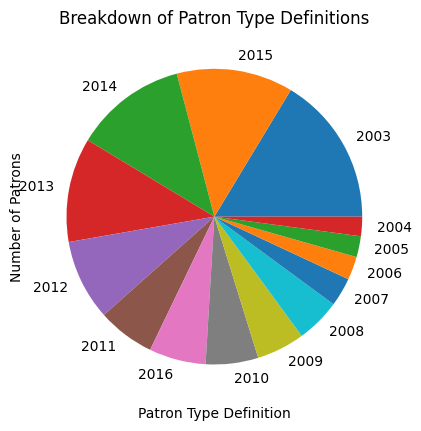

In [5]:
import matplotlib.pyplot as plt

df["Year Patron Registered"].value_counts().plot(
    kind="pie",
)

plt.title("Breakdown of Patron Type Definitions")
plt.ylabel("Number of Patrons")
plt.xlabel("Patron Type Definition")
plt.show()

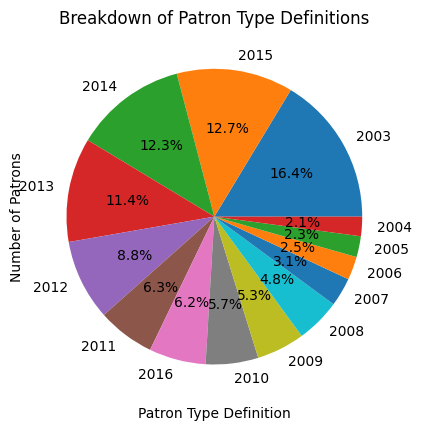

In [8]:
df["Year Patron Registered"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%"
)

plt.title("Breakdown of Patron Type Definitions")
plt.ylabel("Number of Patrons")
plt.xlabel("Patron Type Definition")
plt.show()

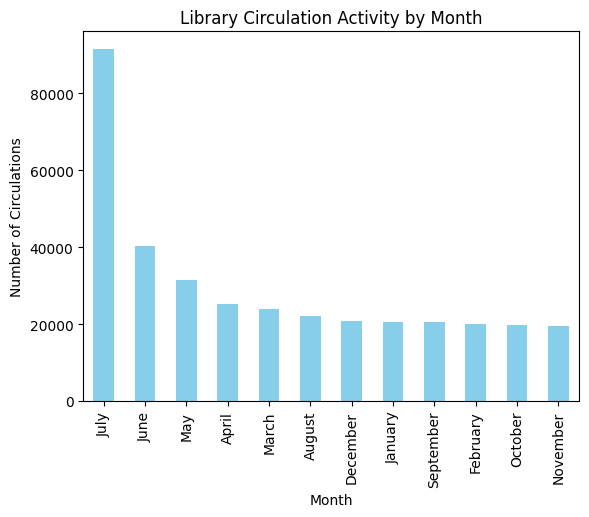

In [9]:

df["Circulation Active Month"].value_counts().plot(
    kind="bar",
    color=["skyblue"]
)

plt.title("Library Circulation Activity by Month")
plt.ylabel("Number of Circulations")
plt.xlabel("Month")
plt.show()

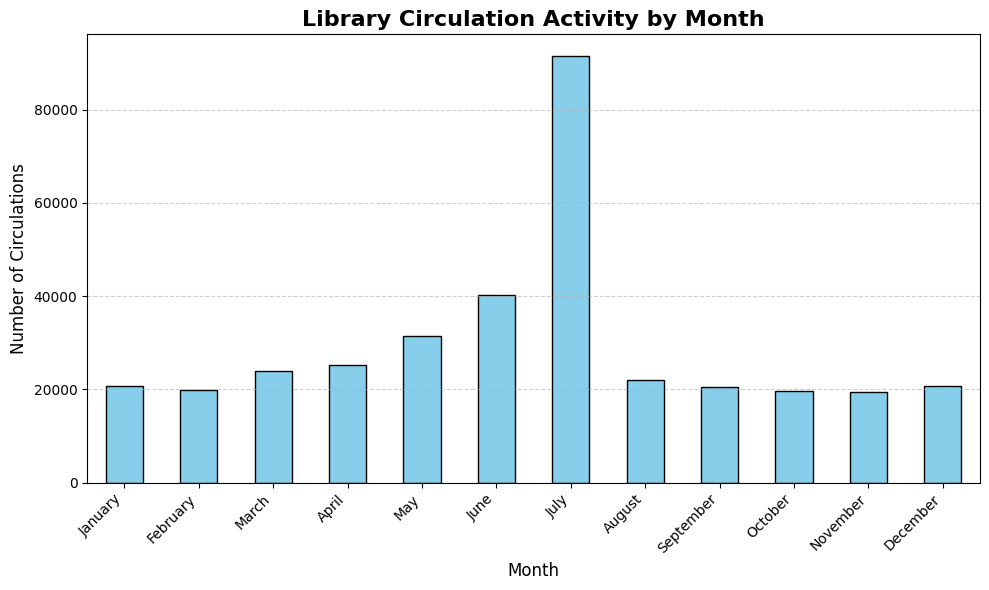

In [10]:

# Sort so months appear chronologically
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_counts = df["Circulation Active Month"].value_counts().reindex(month_order)

# Plot
month_counts.plot(
    kind="bar",
    color="skyblue",
    edgecolor="black",
    figsize=(10,6)
)

plt.title("Library Circulation Activity by Month", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Circulations", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [11]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      355544 non-null  object 
 8   Circulation Active Year       355544 non-null  float64
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

,0
Patron Type Code,0
Patron Type Definition,0
Total Checkouts,0
Total Renewals,0
Age Range,215
Home Library Code,40
Home Library Definition,0
Circulation Active Month,67904
Circulation Active Year,67904
Notice Preference Code,0


In [15]:
df['Circulation Active Month'] = df['Circulation Active Month'].fillna('Not Captured')

In [13]:
df.isna().sum()

,0
Patron Type Code,0
Patron Type Definition,0
Total Checkouts,0
Total Renewals,0
Age Range,215
Home Library Code,40
Home Library Definition,0
Circulation Active Month,0
Circulation Active Year,67904
Notice Preference Code,0


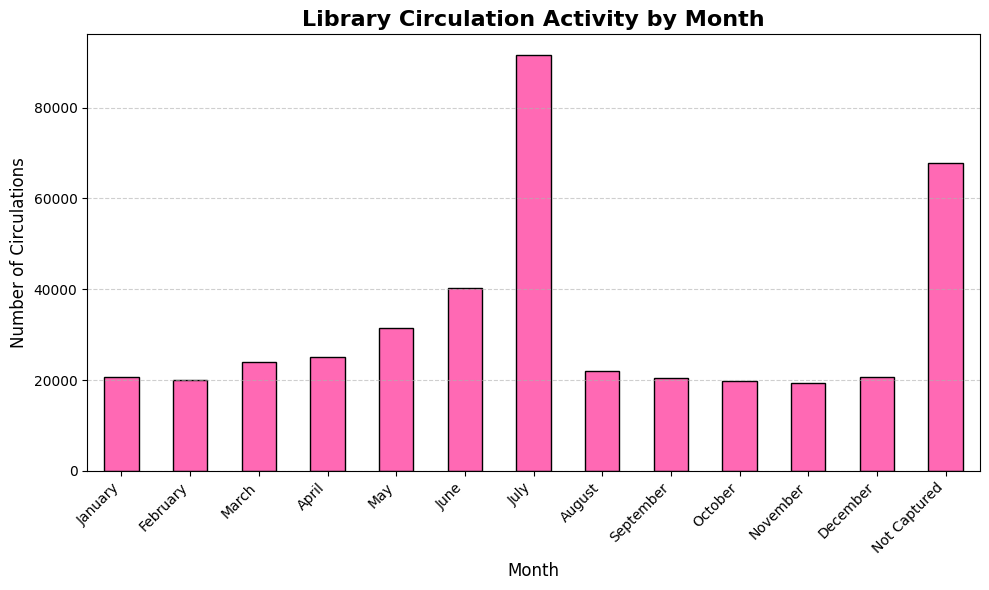

In [16]:

# Sort values so months appear chronologically
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December", "Not Captured"]
month_counts = df["Circulation Active Month"].value_counts().reindex(month_order)

# Plot
month_counts.plot(
    kind="bar",
    color="hotpink",
    edgecolor="black",
    figsize=(10,6)
)

plt.title("Library Circulation Activity by Month", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Circulations", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()